C:\Users\zhenruyi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


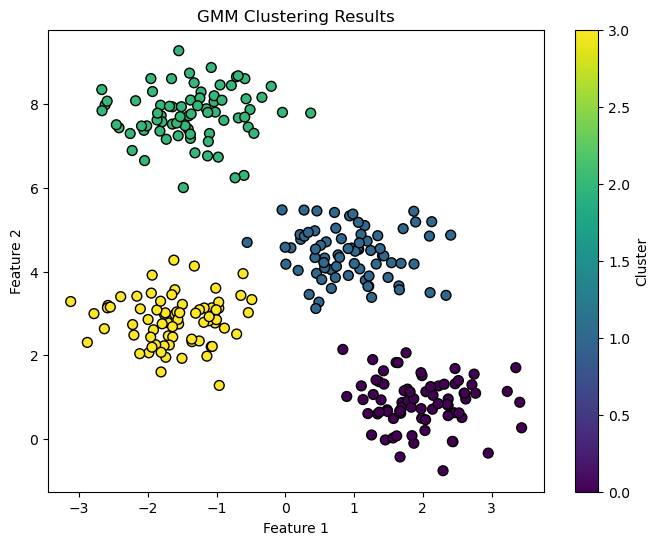

Probability of each data point belonging to each cluster:
[[9.71688955e-01 2.59296402e-02 8.04672295e-21 2.38140471e-03]
 [7.13116691e-33 7.15846263e-09 9.99999993e-01 2.34837535e-15]
 [8.78022033e-12 9.99999970e-01 2.04767765e-08 9.13480329e-09]
 [7.76731322e-35 1.51487210e-09 9.99999998e-01 3.38693314e-18]
 [9.99174464e-01 8.20264795e-04 1.38368754e-24 5.27089805e-06]]


In [6]:
import os
os.environ["OMP_NUM_THREADS"] = "2"  # 限制线程数为 2

from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# 生成模拟数据
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 使用 GMM 进行模型聚类
gmm = GaussianMixture(n_components=4, random_state=42)  # n_components 是簇的数量
labels = gmm.fit_predict(X)

# 可视化聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')
plt.title('GMM Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

# 输出每个数据点属于每个簇的概率
probabilities = gmm.predict_proba(X)
print("Probability of each data point belonging to each cluster:")
print(probabilities[:5])  # 打印前 5 个数据点的概率